In [1]:
import json
import tensorflow as tf
#import tensorflow.keras.optimizers import RMSprop

# Reading the data from the json file

In [2]:
with open('sarcasm.json','r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []
#urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    #urls.append(item['article_link'])

In [3]:
total_data = len(sentences)

# Tokenzing the words from the sentences

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000
#print (len(sentences))
dev_set = total_data - training_size - 1000
test_set = total_data- training_size - dev_set
dv_test = training_size+dev_set
testset = dv_test+test_set

# Dividing the data into training , dev and test sets

In [6]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
Dev_set = sentences[training_size:dv_test]
Dev_set_labels = labels[training_size:dv_test]
testing_sentences = sentences[dv_test:testset]
testing_labels = labels[dv_test:testset]

In [7]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [8]:
word_index = tokenizer.word_index
#print (word_index)

In [9]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

devset_sequences = tokenizer.texts_to_sequences(Dev_set)
devset_padded = pad_sequences(devset_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

In [32]:
print (testing_sentences[2])
print (testing_padded[2])

print (testing_labels[2])



beanie broker urges storkholders to sell
[   1    1  922    1    2 3557    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
1


# Building a simple model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
]
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 40)                680       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                984       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 161,689
Trainable params: 161,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
num_epochs = 20
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(devset_padded,Dev_set_labels))

Train on 20000 samples, validate on 5709 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20000/20000 [==============================] - 1s 72us/sample - loss: 0.6471 - acc: 0.6033 - val_loss: 0.5351 - val_acc: 0.6963
Epoch 2/20
20000/20000 [==============================] - 1s 58us/sample - loss: 0.3681 - acc: 0.8473 - val_loss: 0.3537 - val_acc: 0.8529
Epoch 3/20
20000/20000 [==============================] - 1s 57us/sample - loss: 0.2687 - acc: 0.8942 - val_loss: 0.3545 - val_acc: 0.8446
Epoch 4/20
20000/20000 [==============================] - 1s 59us/sample - loss: 0.2183 - acc: 0.9164 - val_loss: 0.3537 - val_acc: 0.8555
Epoch 5/20
20000/20000 [==============================] - 1s 57us/sample - loss: 0.1821 - acc: 0.9347 - val_loss: 0.3797 - val_acc: 0.8508
Epoch 6/20
20000/20000 [==============================] - 1s 58us/sample - loss: 0.1536 - acc: 0.9459 - val_loss: 0.4156 - val_acc: 0.8506
Epoch 7/20
20000/20000 [==============================] - 1s 59us/sam

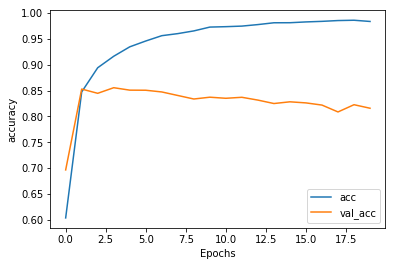

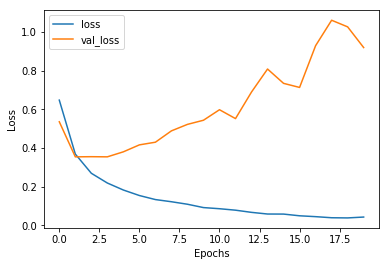

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['acc','val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'])
plt.show()


In [17]:
reverse_word_index = dict((value,key) for (key,value) in word_index.items())


def decoded_senetences(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

print (decoded_senetences(training_padded[0]))
print (training_sequences[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864]


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print (weights.shape)

In [34]:
#model.predict_classes(testing_padded)


In [35]:
loss,acc = model.evaluate(x=testing_padded,y=testing_labels)

1000/1000 [==============================] - 0s 26us/sample - loss: 1.0176 - acc: 0.8100


In [42]:
print ("The loss on the test set: ", loss)
print ("The accuracy on the test set is : ", acc*100 ,'%')

The loss on the test set:  1.017607004404068
The accuracy on the test set is :  81.00000023841858 %
